In [18]:
%pylab inline
import gzip
import numpy as np
import requests
from tqdm import trange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [19]:
def load_img(filename,num_images):
    f = gzip.open(filename,'r')
    image_size=28
    f.read(16)
    buf = f.read(image_size*image_size*num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size)
    return data
def load_labels(filename, num_labels):
    f = gzip.open(filename,'r')
    f.read(8)
    buf = f.read(num_labels)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [20]:
train_size, test_size = 60000,10000
path_img_train = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\train-images-idx3-ubyte.gz'
path_img_test = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\t10k-images-idx3-ubyte.gz'
path_lbl_train = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\train-labels-idx1-ubyte.gz'
path_lbl_test = r'C:\Users\prank\Documents\fromScratch\MNIST\Data\t10k-labels-idx1-ubyte.gz'

X_train,X_test = load_img(path_img_train, 60000), load_img(path_img_test, 10000)
Y_train, Y_test = load_labels(path_lbl_train, 60000), load_labels(path_lbl_test, 10000)

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = nn.Linear(784,128, bias=False)
        self.l2 = nn.Linear(128,10, bias=False)
        self.sm = nn.LogSoftmax(dim=1)
    def forward(self,x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = self.sm(x)
        return x

loss 0.20 accuracy 0.95: 100%|██████████| 1000/1000 [00:03<00:00, 323.31it/s]


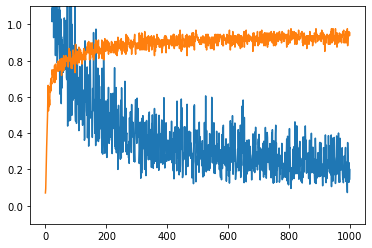

In [22]:
model = Model()
loss_function = nn.NLLLoss(reduction="none")
optim = torch.optim.SGD(model.parameters(), lr =0.001, momentum=0)
BS=128
losses, accuracies = [], []

for i in (t := trange(1000)):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[samp]).long()
    model.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_function(out, Y)
    loss = loss.mean()
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))
plt.ylim(-0.1, 1.1)
plot(losses)
plot(accuracies)

In [ ]:
def softmax(x):
    x = x - np.max(x,axis=1).reshape(x.shape[0],1)
    return np.exp(x) / np.sum(np.exp(x), axis=0)
    pass
def relu(x):
    return x * (x>0)

In [ ]:
### To-Dos
1. Select network architecture
2. Initialize random weights
3. Forward pass
4. Calculate loss on output layer
5. Backpropagation
6. Do for all examples in batch size, update parameters
7. Repeat for x epochs

In [5]:
weights_l1 = np.random.rand(64,28*28)
weights_l2 = np.random.rand(10,64)

#forward propagation
batch_size = 32
epochs=100

z1 = np.zeros((60000, 64))
z2=np.zeros((60000, 10))

z1 = np.dot(x_train.reshape(train_size,28*28)/255, weights_l1.T)
a1 = relu(z1)
z2 = np.dot(a1, weights_l2.T)
a2=softmax(z2)
y_pred = np.argmax(a2, axis=1)
print(y_train)

[5 0 4 ... 5 6 8]


In [6]:
y_train_bn = np.zeros((y_train.shape[0], np.max(y_train)+1))
y_train_bn[np.arange(y_train_bn.shape[0]), y_train.T]=1
loss = np.sum(-np.sum(y_train_bn * np.log(a2), axis=1))
print(loss)

5965916.832660476
